In [0]:
import os
import numpy as np
import torch
import time
import pickle
import matplotlib.pyplot as plt
from collections import OrderedDict
from torch.autograd import Variable
from pathlib import Path
from tqdm import tqdm
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!pip install tensorflow==1.15 scipy==1.0 dominate datetime

     |████████████████████████████████| 412.3MB 43kB/s 
     |████████████████████████████████| 50.0MB 66kB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 3.8MB 26.6MB/s 
     |████████████████████████████████| 512kB 39.2MB/s 
     |████████████████████████████████| 235kB 41.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=55dbda5de5669eaf9b45a9a37bd9d59750bf3e25dbf470ac47b201b9f7907d31
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: seaborn 0.10.0 has requirement scipy>=1.0.1, but you'll have scipy 1.0.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: cvxpy 1.0.31 has requirement scipy>=1.1.0, but you'll have scipy 1.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have 

In [4]:
!ls

drive  sample_data


In [5]:
%cd drive/My\ Drive/do-as-i-do/

/content/drive/My Drive/do-as-i-do


In [6]:
%pwd

'/content/drive/My Drive/do-as-i-do'

In [0]:
import config.test_opt as opt

In [0]:
pix2pixhd_dir = Path('./src/pix2pixHD/')
import sys
sys.path.append(str(pix2pixhd_dir))
%load_ext autoreload
%autoreload 2

In [0]:
from data.data_loader import CreateDataLoader
from models.models import create_model
import util.util as util
from util.visualizer import Visualizer
from util import html

In [0]:
iter_path = os.path.join(opt.checkpoints_dir, opt.name, 'iter.txt')

### Check data source


In [11]:
opt.dataroot

'./data_transfer/'

In [12]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
visualizer = Visualizer(opt)

CustomDatasetDataLoader
dataset [AlignedDataset] was created


# Create a HTML window to visualize poses and images

In [0]:
web_dir = os.path.join(opt.results_dir, opt.name, '%s_%s' % (opt.phase, opt.which_epoch))
webpage = html.HTML(web_dir, 'Experiment = %s, Phase = %s, Epoch = %s' % (opt.name, opt.phase, opt.which_epoch))

In [14]:
webpage

# Visualize poses

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


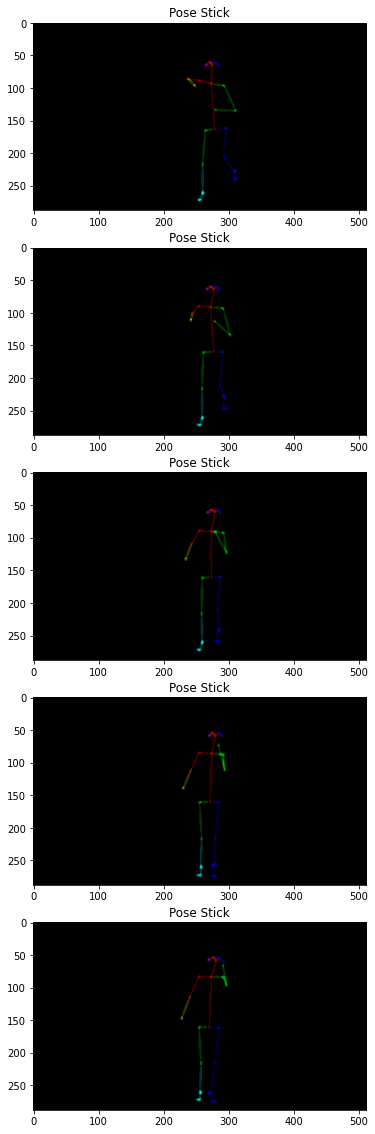

In [19]:
def visulaize_poses(image=False):
  if True:
    plt.figure(figsize = [13,20])
    for i, img in enumerate(dataset):
        #Pose
        plt.subplot(5,1,i+1)
        plt.title("Pose Stick")
        plt.imshow(img['label'][0].permute(1,2,0))
        if i==4:
            break
    plt.show()

visulaize_poses(image=True)

In [20]:
model = create_model(opt)

GlobalGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 1024, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (14): InstanceNorm2d(1024, eps=1e-05, momentum=0.1, affi

# Generate Results

In [0]:
def generate_results(compare=False):
  if True:
    for data in tqdm(dataset):
      minibatch = 1 
      generated = model.inference(data['label'], data['inst'])
          
      visuals = OrderedDict([('Input_label', util.tensor2label(data['label'][0], opt.label_nc)),
                            ('Synthesized_image', util.tensor2im(generated.data[0]))])
      img_path = data['path']
      visualizer.save_images(webpage, visuals, img_path)
    webpage.save()
    torch.cuda.empty_cache()

In [31]:
generate_results(compare=True)

  0%|          | 0/250 [00:00<?, ?it/s]src/pix2pixHD/models/pix2pixHD_model.py:128: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_label = Variable(input_label, volatile=infer)
100%|██████████| 250/250 [00:30<00:00,  8.33it/s]
